In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from uuid import uuid4


# Extends pandas txt accessor
from utils import TextAccessor

In [2]:
recetas = Path().cwd().parent/"Datasets\Scrapper\Recetas"
recetas_csv = recetas.glob("**/*.csv")
df = pd.concat([pd.read_csv(r) for r in recetas_csv])

In [3]:
df.drop_duplicates(inplace=True)
df.head()

,url,title,date,ingredients,steps
0,https://www.recetas.com/ensalada-alemana-de-pa...,Ensalada alemana de patatas,NaN,1 kg de patatas no harinosas cocidas con piel ...,Ensalada alemana de patatas\n\nPoner el caldo...
1,https://www.recetas.com/currywurst.html,Currywurst,NaN,6 salchichas de cerdo 4 cdas. de polvo de curr...,Currywurst\n\nComenzar preparando la salsa: p...
2,https://www.recetas.com/torta-bundt-con-zanaho...,Torta bundt con zanahorias,NaN,3 huevos 170 gr. de azúcar 200 gr. de harina 5...,Torta bundt con zanahorias\n\nUnir en un cuen...
3,https://www.recetas.com/ensalada-alemana-de-pa...,Ensalada alemana de patatas,NaN,500 gr. de patatas 200 gr. de panceta ahumada ...,Ensalada alemana de patatas\n\nLavar las pata...
4,https://www.recetas.com/rote-grutze.html,Rote Grutze,NaN,1 kg. de ciruelas rojas 500 gr. azúcar 3 cdas....,Rote Grutze\n\nCubrir las ciruelas con agua y...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4813 entries, 0 to 23
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   url          4813 non-null   object 
 1   title        4813 non-null   object 
 2   date         0 non-null      float64
 3   ingredients  3979 non-null   object 
 4   steps        4636 non-null   object 
dtypes: float64(1), object(4)
memory usage: 225.6+ KB


In [5]:
df.dropna(inplace=True, subset=["ingredients", "steps"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3979 entries, 0 to 23
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   url          3979 non-null   object 
 1   title        3979 non-null   object 
 2   date         0 non-null      float64
 3   ingredients  3979 non-null   object 
 4   steps        3979 non-null   object 
dtypes: float64(1), object(4)
memory usage: 186.5+ KB


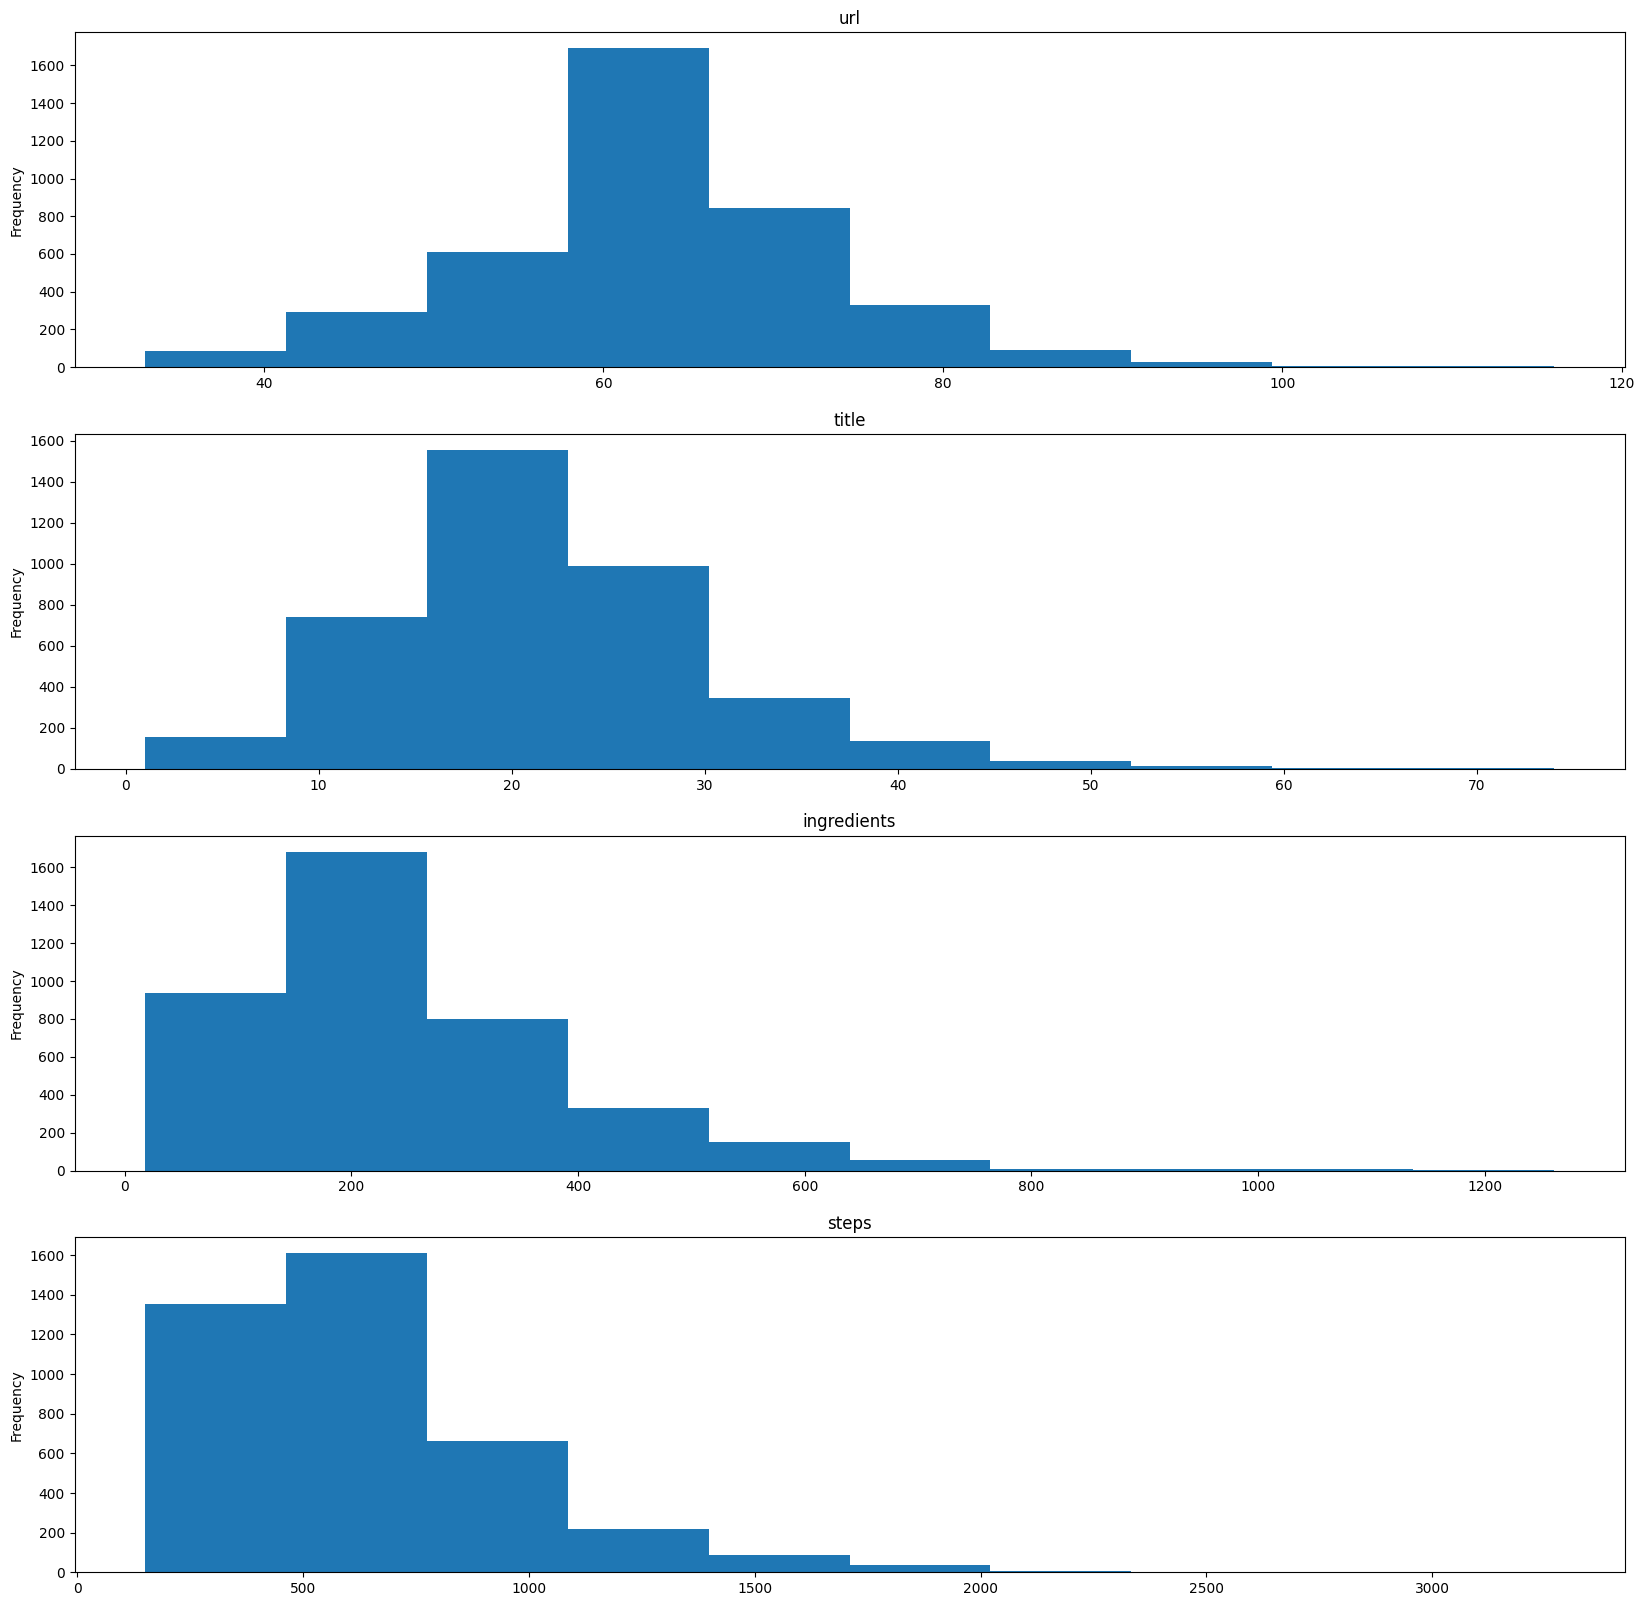

C:\Users\froro\AppData\Local\Temp\ipykernel_6676\783641833.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.ingredients = df.ingredients.str.replace("cdas.", "cucharadas").str.replace("\n"," ")
C:\Users\froro\AppData\Local\Temp\ipykernel_6676\783641833.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.steps = df.steps.str.replace("cdas.", "cucharadas").str.replace("\n"," ")


In [6]:
df.utils_text.plot_length_text()
df.ingredients = df.ingredients.str.replace("cdas.", "cucharadas").str.replace("\n"," ")
df.steps = df.steps.str.replace("cdas.", "cucharadas").str.replace("\n"," ")

In [7]:
df.ingredients = df.ingredients.str.replace("\n"," ")
df.steps = df.steps.str.replace("\n"," ")

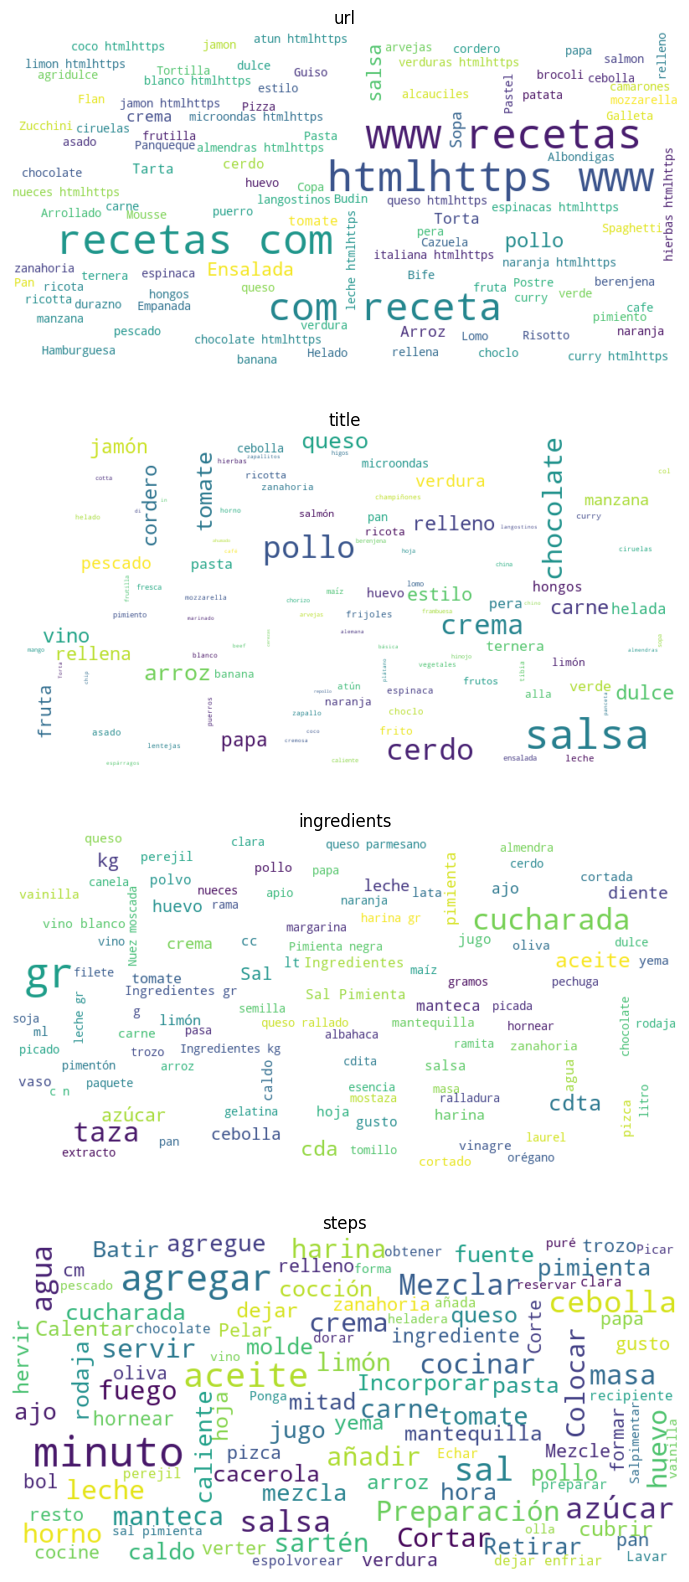

In [8]:
df.utils_text.plot_word_cloud()

In [9]:
def create_template(title, ingredients, steps):
    template = f"""
    title: {title}
    Ingredientes:
    {ingredients}
    Pasos:
    {steps}
    """
    return template

df["Template"] = df.apply(lambda x: create_template(x.title, x.ingredients, x.steps), axis=1)
df["Template"].iloc[:10].apply(print)


    title: Ensalada alemana de patatas
    Ingredientes:
    1 kg de patatas no harinosas cocidas con piel el día anterior 125 ml de caldo de carne (o caldo de verduras para la opción vegana) 2 cucharadas de aceite de oliva 2 cucharadas de vinagre de vino 1 cebolla blanca 1 pizca de azúcar Sal y pimienta al gusto Cebollino  
    Pasos:
     Ensalada alemana de patatas  Poner el caldo al fuego, cuando rompe el hervor agregar la cebolla finamente picada, el aceite, vinagre, y el azúcar. Cocinar hasta que la cebolla esté tierna  Mientras tanto pelar las patatas cocidas el día anterior y cortarlas en rodajas finas.  Poner las patatas en un bol y verter por encima el aderezo con la cebolla.  Mezclar bien, sazonar con sal y pimienta, agregar cebollino frescos picado.  Se puede comer de inmediato pero queda mucho mejor fría, acompañada de salchichas alemanas.
    

    title: Currywurst
    Ingredientes:
    6 salchichas de cerdo 4 cucharadas de polvo de curry 1 cebolla blanca 1 cdta. de pap

0     None
1     None
2     None
3     None
4     None
6     None
7     None
8     None
9     None
10    None
Name: Template, dtype: object

In [10]:
df["uuid"] = df.apply(lambda x: uuid4(), axis=1)

In [11]:
csv = Path().cwd().parent/"Clean/all.csv"
df_princiapl = pd.read_csv(str(csv)).head()

In [14]:
df = df[["uuid","title","ingredients","steps"]]
pd.concat([df_princiapl, df]).to_csv(csv, index=False)